# Bounding Box Segmentation Extraction

This demo shows how a trained object detector combined with vegetation indices can be used to localize and extract target vegetation.


The extraction process involves:

1) Google Colab setup

2) Model setup

2) Object detection on images and bbox generation

3) Mask generation using ExG and morphological closing operations

4) Foreground extraction


## Google Colab setup
This demos requires importing model weight and custom files. To run in google colab, click  here [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mkutu/pheno-poa)

### Clone repo to temporary google drive folder

### Mount google drive to colab

In [1]:
# # Mount Google Drive
# from google.colab import drive # import drive from google colab

# ROOT = "/content/drive"     # default location for the drive
# print(ROOT)                 # print content of ROOT (Optional)

# drive.mount(ROOT)           # we mount the google drive at /content/drive

In [43]:
## download repo and weight files
## uncomment to use in colab
# %rm -r /content/pheno-annotate # Only use this to remove previous clones
# ! git clone https://github.com/mkutu/pheno-annotate.git
# %cd pheno-annotate
# download model weights
# !gdown --id 1XLA-VTJVc6Pd1K_B6-MxI8jn_edh16DU
# ! git pull
# !pip install -r requirements.txt
# !pip uninstall imgaug && pip install imgaug #restart runtime

--2021-03-15 20:14:53--  https://drive.google.com/file/d/1XLA-VTJVc6Pd1K_B6-MxI8jn_edh16DU/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.250.115.102, 142.250.115.113, 142.250.115.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.115.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3_ckpt.pth’

yolov3_ckpt.pth         [ <=>                ]  69.00K  --.-KB/s    in 0.03s   

2021-03-15 20:14:53 (2.37 MB/s) - ‘yolov3_ckpt.pth’ saved [70659]



In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import torch

import random
random.seed(42)

from veg_utils import predict_bbox, extract_from_bbox

in_colab = 'google.colab' in str(get_ipython())

In [2]:
model_def = "./yolov3/yolov3-custom.cfg"
weights_path = ("yolov3_ckpt.pth" if not in_colab else "/content/pheno-annotate/yolov3_ckpt_20_0.78879.pth")
image_dir = "./data/custom/sample/"
class_path = "./data/custom/classes.txt"

# For testing
ino = 3
imgp_glob = random.sample(glob.glob(image_dir + "*.png"),ino)

# Read  a sample image and mask from the data-set
# imgp_glob = glob.glob(image_dir) # uncomment to process entire directory

# Get classes
fp = open(class_path, "r")
classes = fp.read()#split("\n")[:-1]

img_size = 416

# Model confidence threshold
conf_thres = 0.3
nms_thres = 0.4

os.makedirs("output", exist_ok=True)
# imgp_list
classes

'clover'

## Setup model
Define third party modules and call model here


In [1]:
from yolov3.models import Darknet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Call model
model = Darknet(model_def, img_size=img_size).to(device)
# Load pretrained weights
if in_colab:
    model.load_state_dict(torch.load(weights_path, map_location=torch.device('cpu')))
else:
    model.load_state_dict(torch.load(weights_path))
# Set to evaluation
model.eval()  
Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

NameError: name 'torch' is not defined

## Get bboxes for each image

In [4]:
img_bbox_pairs = predict_bbox(imgp_glob,model,classes, conf_thres=conf_thres, nms_thres=nms_thres, img_size=416)
# Inspect format
# img_bbox_pairs[0]

1


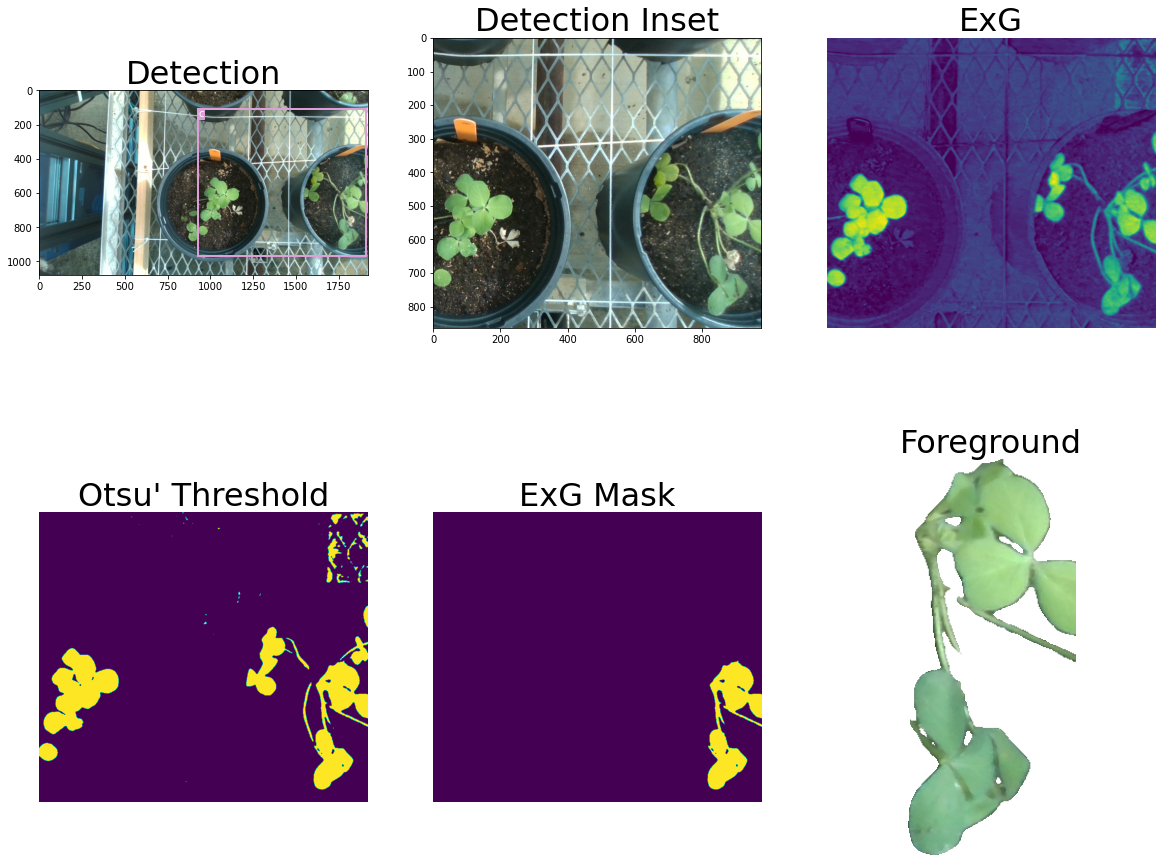

1


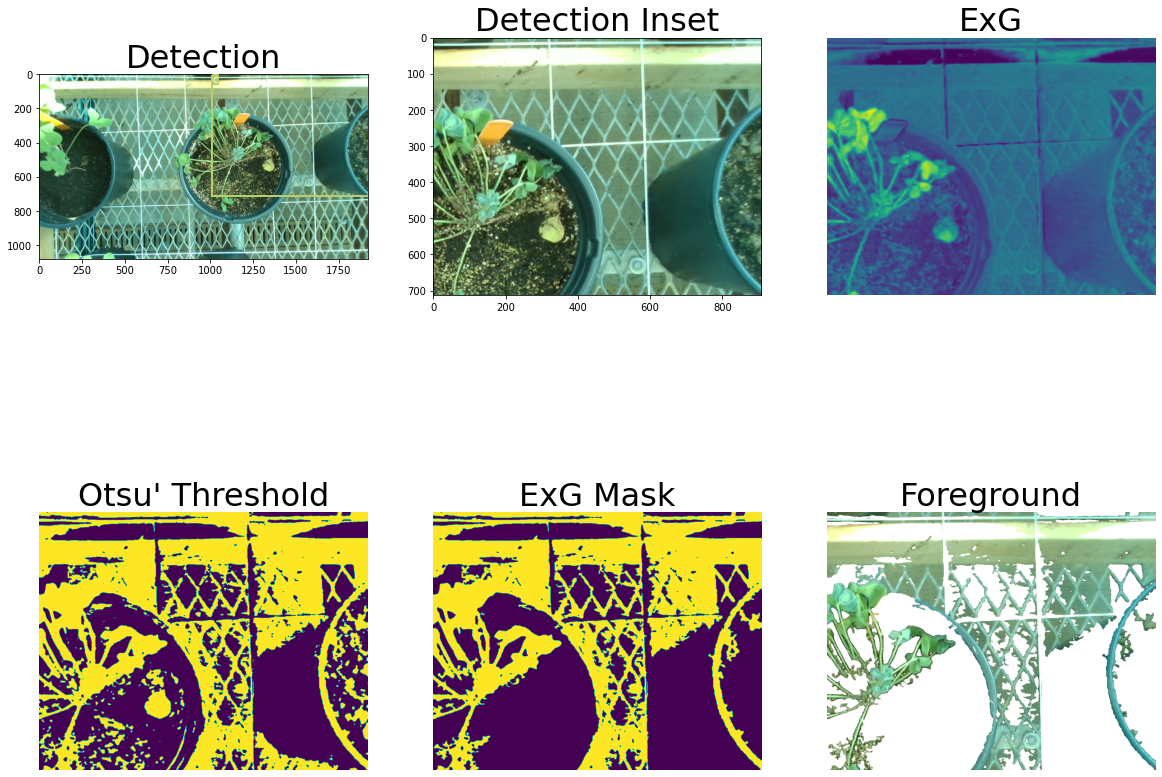

2


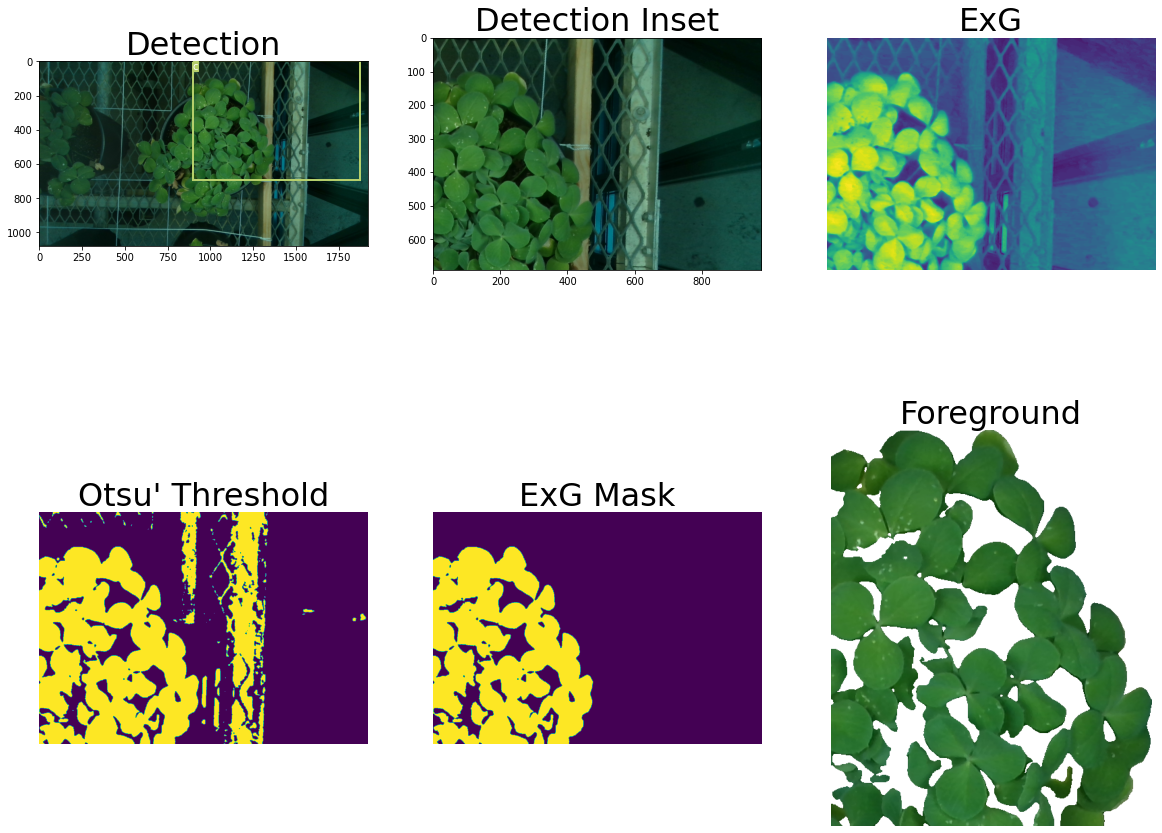

2


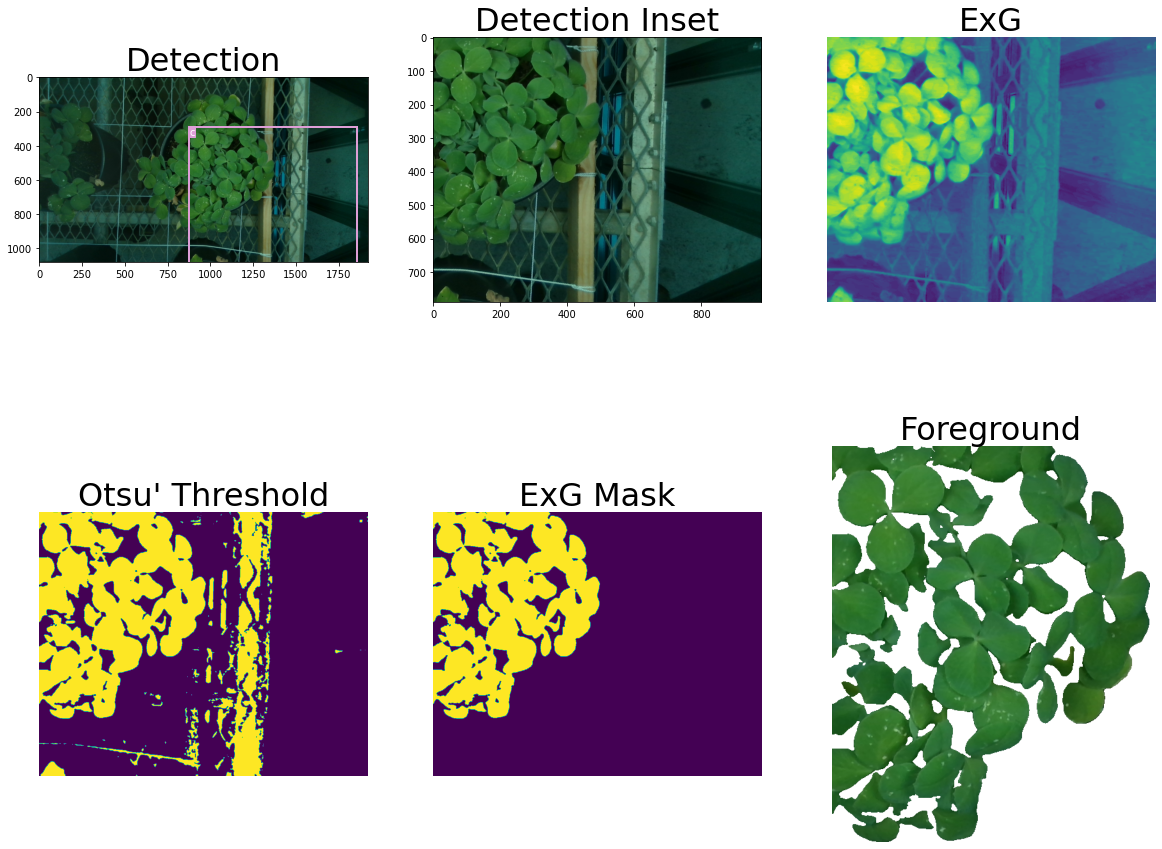

In [5]:
#####################
exg_thresh = 0 # ExG threshold value 

show_plots = True # Show plots here in notebook

save_plots = True # Found in ./output/figures
save_foregrounds = True # ./output/foregrounds
####################

# Extract vegetation using bbox localization
extract_from_bbox(img_bbox_pairs, exg_thresh, show_plots=show_plots, save_plots=save_plots, save_foregrounds=save_foregrounds)